<a href="https://colab.research.google.com/github/Ro-shni/Zeotap/blob/main/Roshni_Nekkanti_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

#LOAD DATA

In [24]:
customers_path = '/content/Customers.csv'
transactions_path = '/content/Transactions.csv'
products_path = '/content/Products.csv'
# Reading the datasets
customers_df = pd.read_csv(customers_path)
transactions_df = pd.read_csv(transactions_path)
products_df = pd.read_csv(products_path)
# Display the first few rows of each dataset for inspection
customers_df.head(), transactions_df.head(), products_df.head()

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  ,
   ProductID              ProductName     Catego

In [25]:
products_df.info()
transactions_df.info()
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
<class 'pan

#EDA


In [26]:
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [27]:
# Summary statistics
print(customers_df.describe(include='all'))  # Includes categorical variables
print(products_df.describe())
print(transactions_df.describe())

# Unique value counts for categorical columns
print(customers_df['Region'].value_counts())
print(products_df['Category'].value_counts())


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
Category
Books

Missing values in each column:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Duplicate entries in each dataset:
0 

0 

0 

Descriptive statistics for Customers dataset:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00 

Descriptive statistics for Transactions dataset:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000   

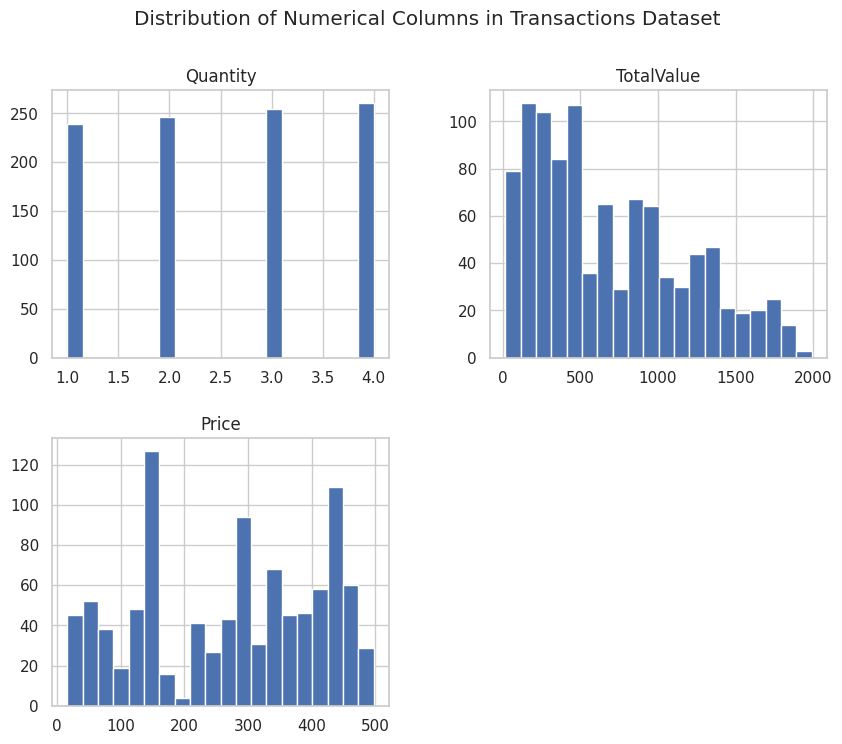

   TotalSpending  PurchaseFrequency  Recency
0        3354.52                5.0      932
1        1862.74                4.0     1079
2        2725.38                4.0      326
3        5354.88                8.0      841
4        2034.24                3.0      896


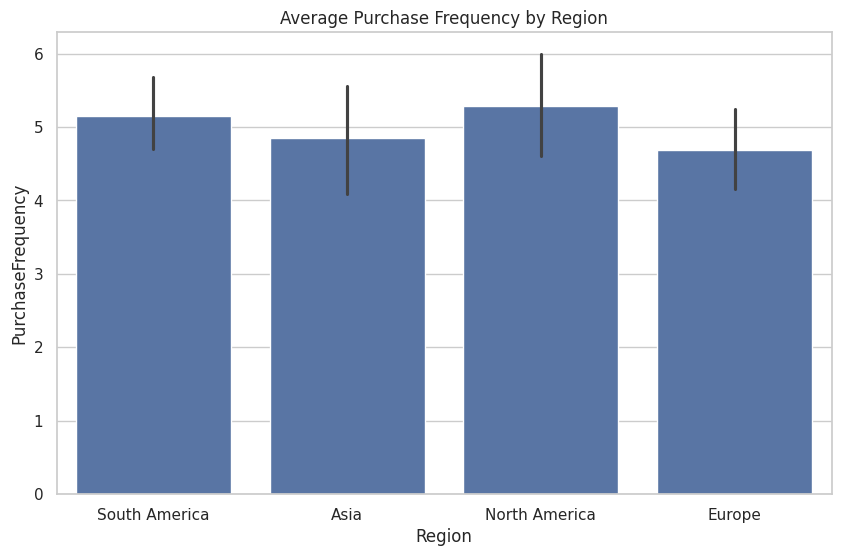

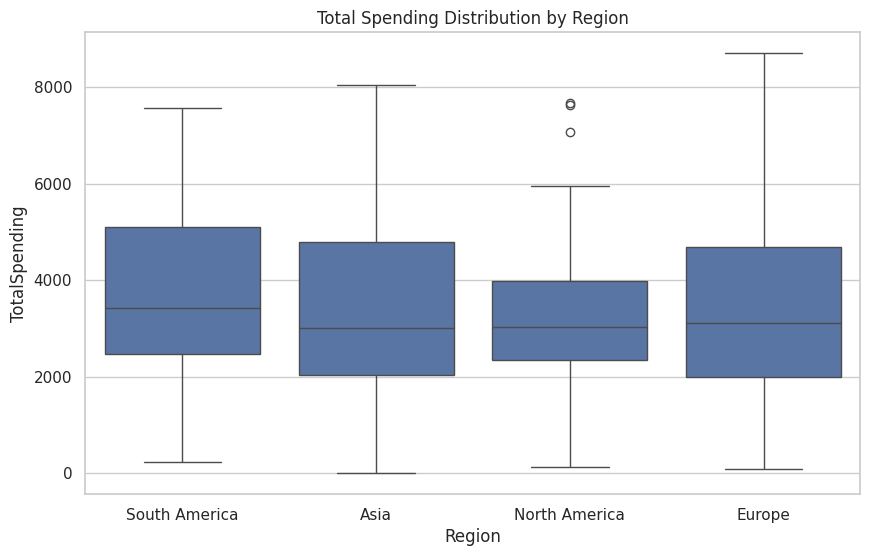

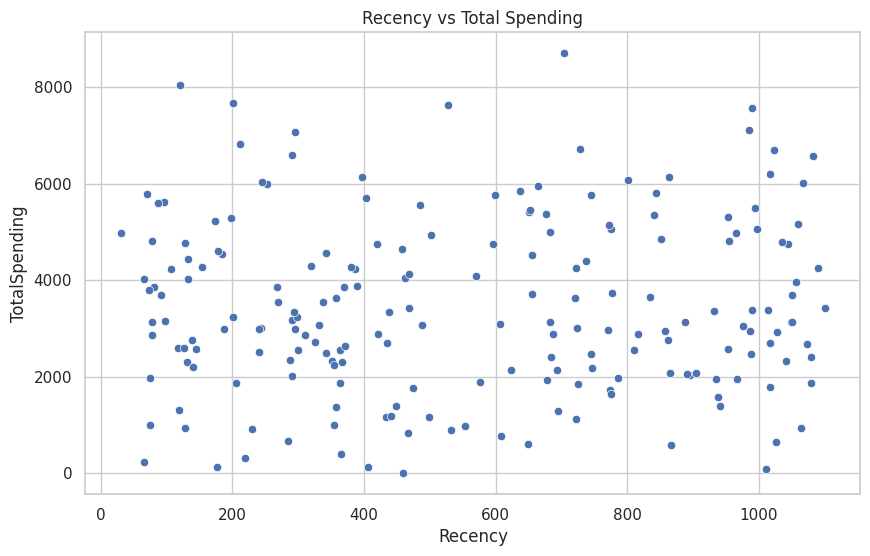

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')
products_df = pd.read_csv('Products.csv')

# Data Cleaning
# Check for missing values
print("Missing values in each column:")
print(customers_df.isnull().sum(), '\n')
print(transactions_df.isnull().sum(), '\n')
print(products_df.isnull().sum(), '\n')

# Check for duplicate values
print("Duplicate entries in each dataset:")
print(customers_df.duplicated().sum(), '\n')
print(transactions_df.duplicated().sum(), '\n')
print(products_df.duplicated().sum(), '\n')

# Convert dates to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Descriptive Statistics
# Get summary statistics for numerical columns
print("Descriptive statistics for Customers dataset:")
print(customers_df.describe(), '\n')

print("Descriptive statistics for Transactions dataset:")
print(transactions_df.describe(), '\n')

# Distribution Analysis


# Plot histograms for numerical columns in Transactions dataset
transactions_df[['Quantity', 'TotalValue', 'Price']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Columns in Transactions Dataset')
plt.show()

# Correlation Analysis
# Calculate correlation between numerical columns in Customers and Transactions datasets

# Feature Engineering
# Calculate Total Spending (Price * Quantity) for each transaction
transactions_df['TotalSpending'] = transactions_df['Quantity'] * transactions_df['Price']

# Aggregate Total Spending by CustomerID
customer_spending = transactions_df.groupby('CustomerID')['TotalSpending'].sum().reset_index()

# Calculate Purchase Frequency (number of transactions for each customer)
purchase_frequency = transactions_df.groupby('CustomerID')['TransactionID'].count().reset_index()
purchase_frequency = purchase_frequency.rename(columns={'TransactionID': 'PurchaseFrequency'})

# Calculate Recency (days since last signup)
customers_df['Recency'] = (pd.to_datetime('today') - customers_df['SignupDate']).dt.days

# Merge the features with customers_df
customers_df = pd.merge(customers_df, customer_spending, on='CustomerID', how='left')
customers_df = pd.merge(customers_df, purchase_frequency, on='CustomerID', how='left')

# Handle missing values (if any)
customers_df['TotalSpending'] = customers_df['TotalSpending'].fillna(0)
customers_df['PurchaseFrequency'] = customers_df['PurchaseFrequency'].fillna(0)

# Outlier Detection and Handling (IQR method)
# Calculate Q1, Q3, and IQR for each column separately
Q1 = customers_df[['TotalSpending', 'PurchaseFrequency', 'Recency']].quantile(0.25)
Q3 = customers_df[['TotalSpending', 'PurchaseFrequency', 'Recency']].quantile(0.75)
IQR = Q3 - Q1

# Clip the values for each column
for col in ['TotalSpending', 'PurchaseFrequency', 'Recency']:
    customers_df[col] = customers_df[col].clip(lower=Q1[col] - 1.5 * IQR[col], upper=Q3[col] + 1.5 * IQR[col])

# Check the updated DataFrame
print(customers_df[['TotalSpending', 'PurchaseFrequency', 'Recency']].head())


# Visualizations
# Bar Plot for Purchase Frequency by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='PurchaseFrequency', data=customers_df)
plt.title('Average Purchase Frequency by Region')
plt.show()

# Boxplot for Total Spending by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalSpending', data=customers_df)
plt.title('Total Spending Distribution by Region')
plt.show()

# Scatter Plot for Recency vs Total Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='TotalSpending', data=customers_df)
plt.title('Recency vs Total Spending')
plt.show()


##visualizations

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

# ---- 1. Customers Dataset Analysis ----
print("Number of unique customers:", customers_df['CustomerID'].nunique())
print("Customer distribution by region:")
region_counts = customers_df['Region'].value_counts()
print(region_counts)


Number of unique customers: 200
Customer distribution by region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<ipython-input-30-8fa698214da5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


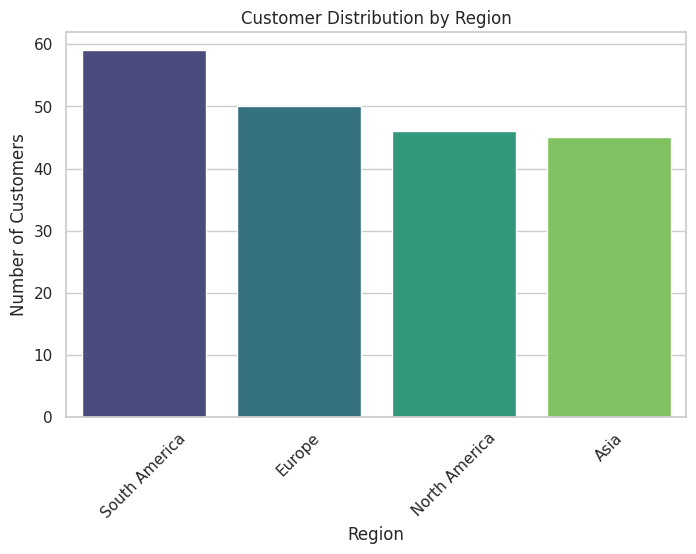

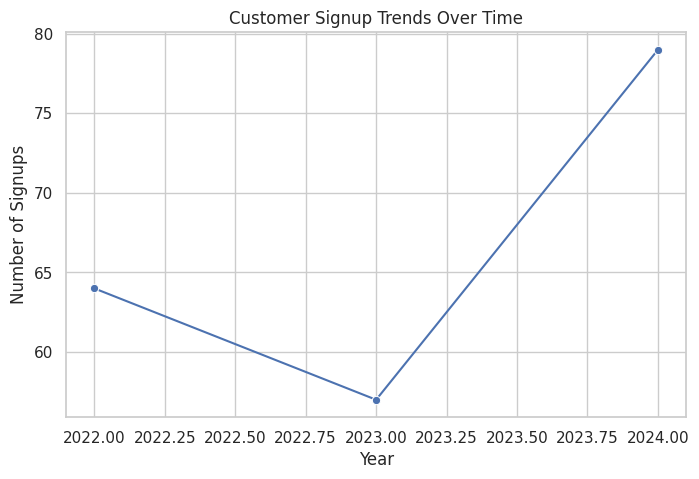

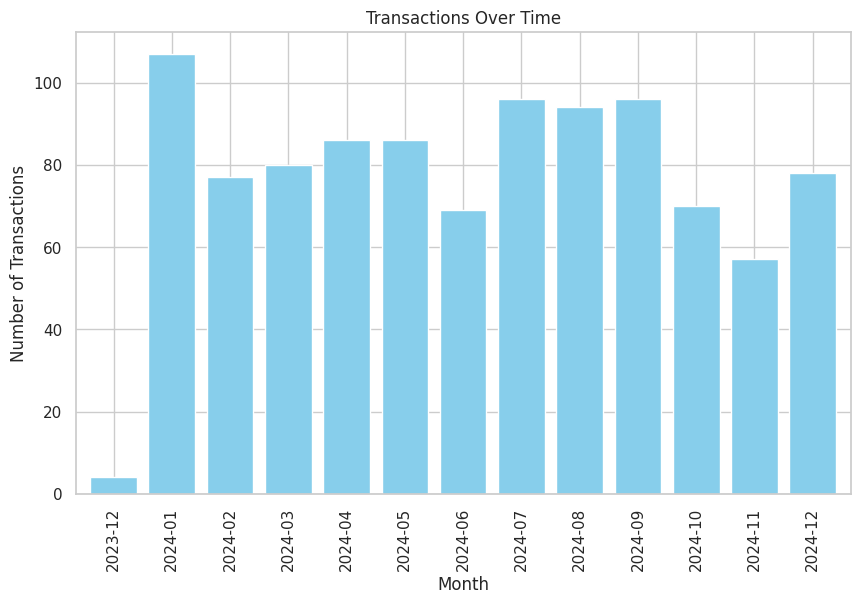

Top 5 Customers by Spending:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


<ipython-input-30-8fa698214da5>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette="coolwarm")


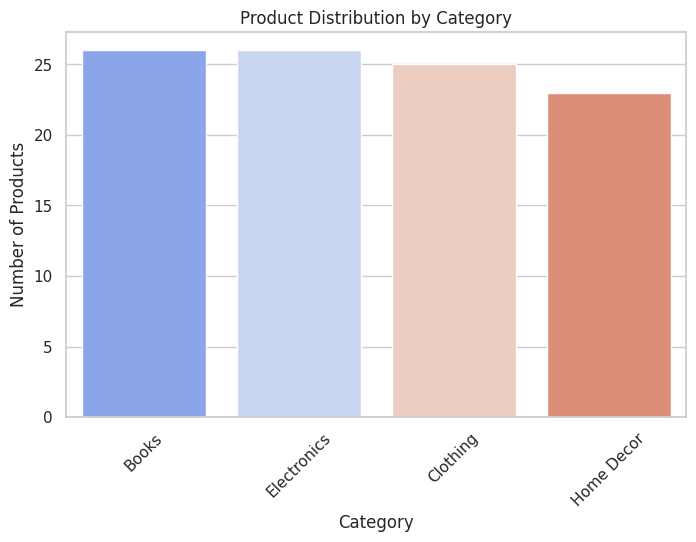

Top 5 Most Expensive Products:
   ProductID           ProductName     Category   Price
74      P075      TechPro Textbook        Books  497.76
31      P032    BookWorld Cookbook        Books  488.63
44      P045     SoundWave T-Shirt     Clothing  481.78
16      P017   ActiveWear Textbook        Books  469.77
36      P037  SoundWave Smartwatch  Electronics  459.86
Top 5 Products by Revenue:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


<ipython-input-30-8fa698214da5>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")


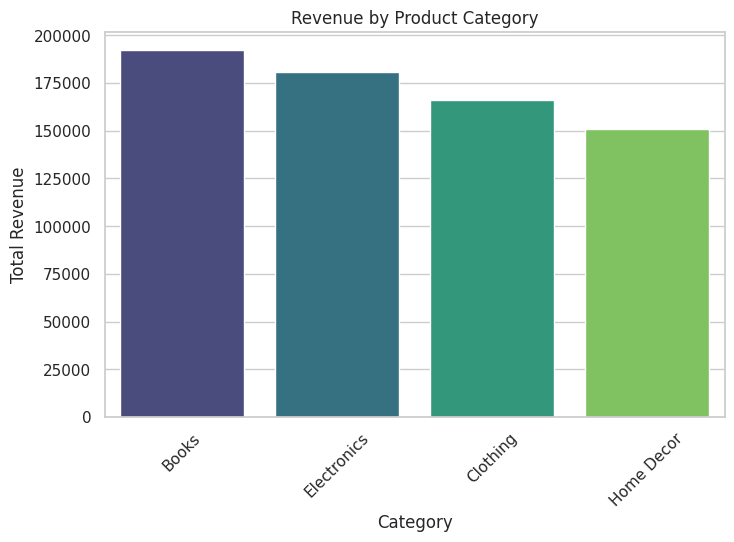

In [30]:

# Plot customer distribution by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

# Convert SignupDate to datetime for analysis
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year

# Plot signup trends over time
signup_trends = customers_df['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker='o')
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

# ---- 2. Transactions Dataset Analysis ----
# Convert TransactionDate to datetime
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')

# Number of transactions over time
transaction_trends = transactions_df['TransactionMonth'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
transaction_trends.plot(kind='bar', color='skyblue', width=0.8)
plt.title("Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

# Analyze total spending per customer
customer_spending = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("Top 5 Customers by Spending:")
print(customer_spending.head())

# ---- 3. Products Dataset Analysis ----
# Distribution of products by category
product_category_counts = products_df['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette="coolwarm")
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

# Top 5 most expensive products
top_expensive_products = products_df.sort_values(by='Price', ascending=False).head()
print("Top 5 Most Expensive Products:")
print(top_expensive_products)

# Merge transactions with products for deeper analysis
merged_df = pd.merge(transactions_df, products_df, on='ProductID')
top_revenue_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head()
print("Top 5 Products by Revenue:")
print(top_revenue_products)

# Plot revenue by product category
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


In [31]:
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Check the data types
print(customers_df.dtypes)
print(transactions_df.dtypes)


CustomerID                   object
CustomerName                 object
Region                       object
SignupDate           datetime64[ns]
Recency                       int64
TotalSpending               float64
PurchaseFrequency           float64
SignupYear                    int32
dtype: object
TransactionID               object
CustomerID                  object
ProductID                   object
TransactionDate     datetime64[ns]
Quantity                     int64
TotalValue                 float64
Price                      float64
TotalSpending              float64
TransactionMonth         period[M]
dtype: object


In [32]:
# Basic summary statistics
print(customers_df.describe())
print(products_df.describe())
print(transactions_df.describe())

# Summary statistics for 'SignupDate' in customers dataset
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
print(customers_df['SignupYear'].value_counts().sort_index())

# Summary statistics for 'TransactionDate' in transactions dataset
transactions_df['TransactionYear'] = transactions_df['TransactionDate'].dt.year
print(transactions_df['TransactionYear'].value_counts().sort_index())


                SignupDate      Recency  TotalSpending  PurchaseFrequency  \
count                  200   200.000000     200.000000         200.000000   
mean   2023-07-19 08:31:12   557.645000    3440.132056           4.995000   
min    2022-01-22 00:00:00    30.000000       0.000000           0.000000   
25%    2022-09-26 12:00:00   289.500000    2137.540000           3.000000   
50%    2023-08-31 12:00:00   514.500000    3137.420000           5.000000   
75%    2024-04-12 12:00:00   853.500000    4764.412500           6.000000   
max    2024-12-28 00:00:00  1101.000000    8704.721250          10.500000   
std                    NaN   325.526568    1810.625760           2.208361   

        SignupYear  
count   200.000000  
mean   2023.075000  
min    2022.000000  
25%    2022.000000  
50%    2023.000000  
75%    2024.000000  
max    2024.000000  
std       0.844358  
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    29

<ipython-input-33-8c36092650b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SignupYear', data=customers_df, palette='viridis')


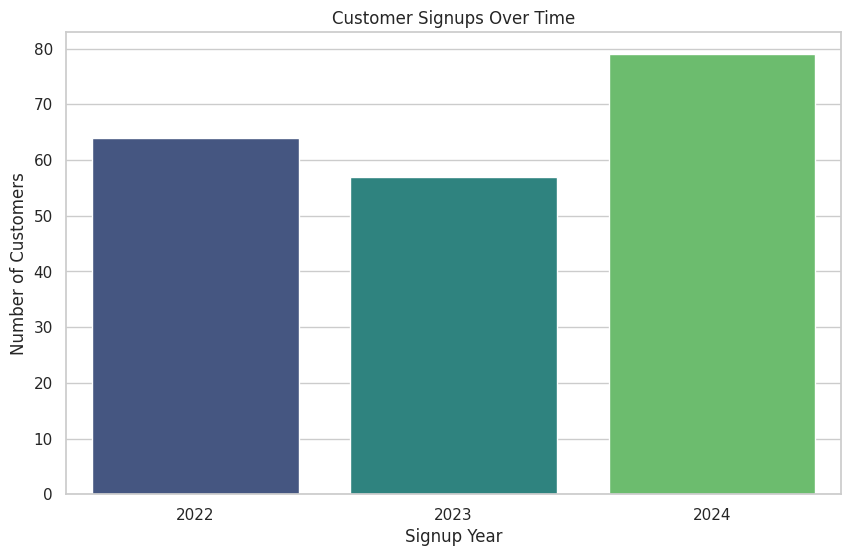

In [33]:
# Number of customers who signed up each year
plt.figure(figsize=(10, 6))
sns.countplot(x='SignupYear', data=customers_df, palette='viridis')
plt.title('Customer Signups Over Time')
plt.xlabel('Signup Year')
plt.ylabel('Number of Customers')
plt.show()


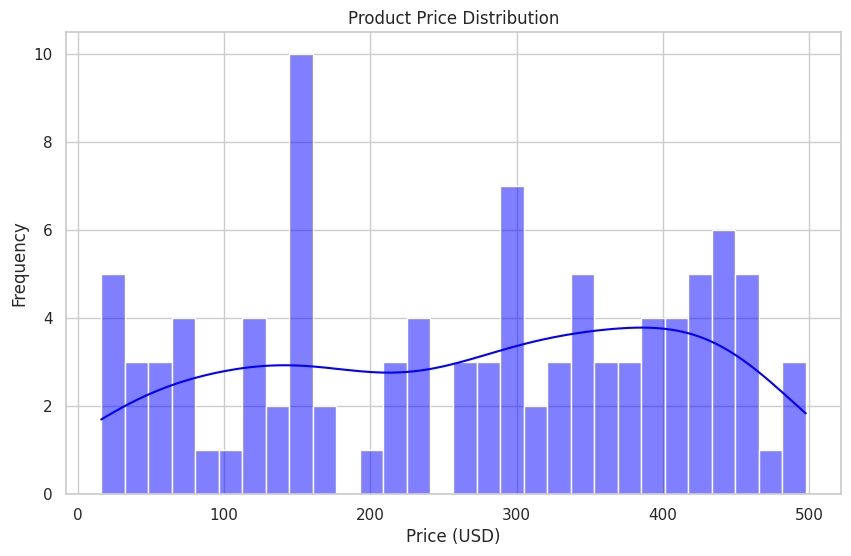

In [34]:
# Distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(products_df['Price'], kde=True, bins=30, color='blue')
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


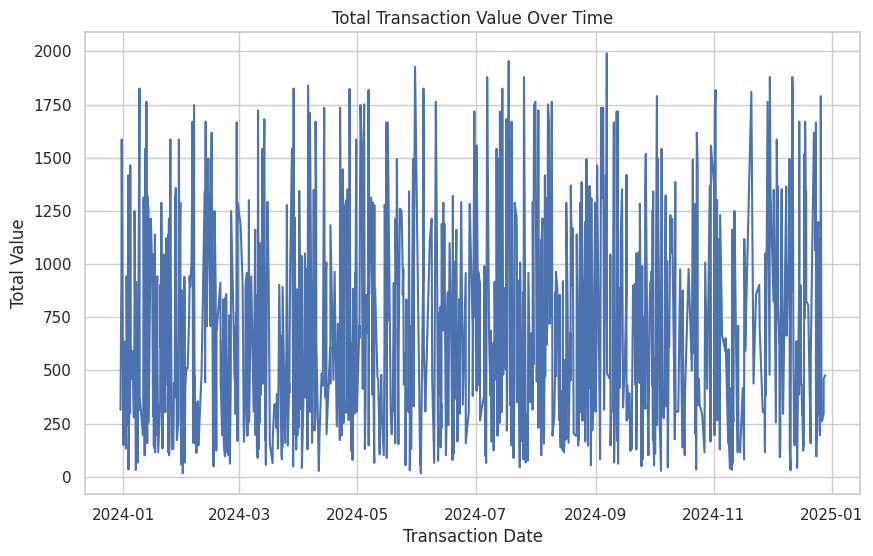

In [35]:
# Transaction totals over time
transactions_df['TotalValue'] = transactions_df['Quantity'] * transactions_df['Price']
plt.figure(figsize=(10, 6))
sns.lineplot(x='TransactionDate', y='TotalValue', data=transactions_df)
plt.title('Total Transaction Value Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Value')
plt.show()


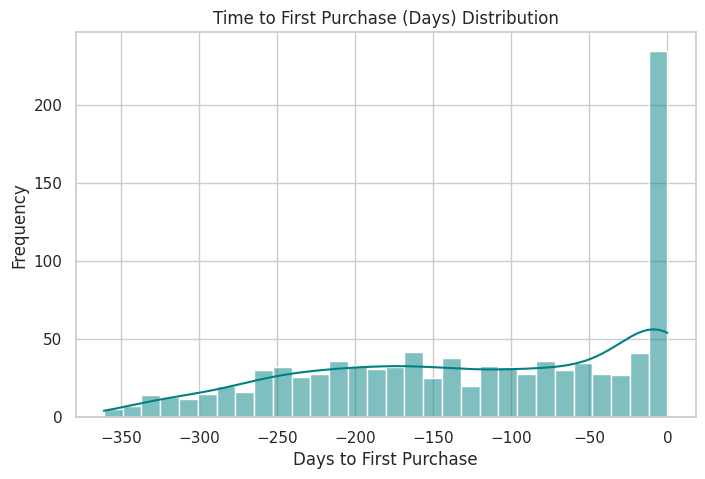

Median time to first purchase: -113.0 days


In [36]:
# Calculate time difference between signup and first purchase
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge datasets to associate customer details with transaction info
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID')

# Find first purchase date for each customer
first_purchase = merged_df.groupby('CustomerID')['TransactionDate'].min()

# Calculate time to first purchase
merged_df = merged_df.set_index('TransactionDate')
merged_df['DaysToFirstPurchase'] = (first_purchase[merged_df['CustomerID']].values - merged_df.index).days

# Plot distribution of time to first purchase
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['DaysToFirstPurchase'], bins=30, kde=True, color='teal')
plt.title('Time to First Purchase (Days) Distribution')
plt.xlabel('Days to First Purchase')
plt.ylabel('Frequency')
plt.show()

# Insight example
print(f"Median time to first purchase: {merged_df['DaysToFirstPurchase'].median()} days")


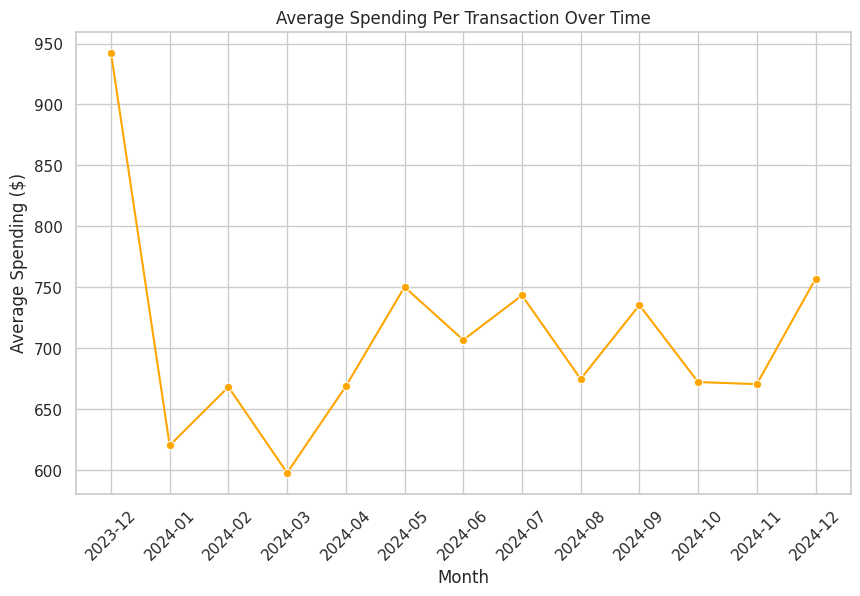

Average spending per transaction in the last month: 757.0410256410256


<ipython-input-37-a7f91fc3d301>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average spending per transaction in the last month: {avg_spending_per_month[-1]}")


In [37]:
# Calculate average spending per transaction by month
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
avg_spending_per_month = transactions_df.groupby('TransactionMonth')['TotalValue'].mean()

# Plot the average spending over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_spending_per_month.index.astype(str), y=avg_spending_per_month.values, marker='o', color='orange')
plt.title('Average Spending Per Transaction Over Time')
plt.xlabel('Month')
plt.ylabel('Average Spending ($)')
plt.xticks(rotation=45)
plt.show()

# Insight example
print(f"Average spending per transaction in the last month: {avg_spending_per_month[-1]}")


In [40]:
# Merge transactions with products to include product names
merged_df = pd.merge(transactions_df, products_df[['ProductID', 'ProductName']], on='ProductID', how='left')

print(merged_df.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'TotalSpending', 'TransactionMonth',
       'TransactionYear', 'ProductName'],
      dtype='object')


In [41]:
# Get frequency of purchases for each product per customer
customer_product_frequency = merged_df.groupby(['CustomerID', 'ProductName'])['TransactionID'].count().unstack(fill_value=0)

# Find customers with high purchase frequency for a particular product
frequent_buyers = customer_product_frequency[customer_product_frequency > 3].dropna(how='all')

# Display frequent buyers of a product
print(frequent_buyers)

# Insight example
print("Customers with frequent purchases (more than 5):")
print(frequent_buyers)


Empty DataFrame
Columns: [ActiveWear Biography, ActiveWear Cookbook, ActiveWear Cookware Set, ActiveWear Headphones, ActiveWear Jacket, ActiveWear Jeans, ActiveWear Rug, ActiveWear Running Shoes, ActiveWear Smartphone, ActiveWear Smartwatch, ActiveWear T-Shirt, ActiveWear Textbook, ActiveWear Wall Art, BookWorld Biography, BookWorld Bluetooth Speaker, BookWorld Cookbook, BookWorld Cookware Set, BookWorld Jacket, BookWorld Rug, BookWorld Running Shoes, BookWorld Smartwatch, BookWorld Sweater, BookWorld Wall Art, ComfortLiving Biography, ComfortLiving Bluetooth Speaker, ComfortLiving Cookware Set, ComfortLiving Desk Lamp, ComfortLiving Headphones, ComfortLiving Laptop, ComfortLiving Mystery Book, ComfortLiving Rug, ComfortLiving Smartphone, ComfortLiving Smartwatch, ComfortLiving Sweater, HomeSense Bluetooth Speaker, HomeSense Cookware Set, HomeSense Desk Lamp, HomeSense Headphones, HomeSense Novel, HomeSense Rug, HomeSense Running Shoes, HomeSense Sweater, HomeSense T-Shirt, HomeSense W